We can also visualize how the feature representations specialize for different classes. Take 1000
random images from the test set of PASCAL, and extract ImageNet (finetuned) features from
those images. Compute a 2D t-SNE (use sklearn) projection of the features, and plot them with
each feature color-coded by the GT class of the corresponding image. If multiple objects are
active in that image, compute the color as the “mean” color of the different classes active in that
image. Add a legend explaining the mapping from color to object class.

In [13]:
import numpy as np
from voc_dataset import VOCDataset
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from torchvision import models
import torch

In [9]:
test_dataset = VOCDataset(split='test', size=224, data_dir='../data/VOCdevkit/VOC2007/')


In [10]:
np.random.seed(0)
indices = np.random.choice(len(test_dataset), 1000, replace=False)
images = [test_dataset[i][0] for i in indices]
labels = [test_dataset[i][1] for i in indices]

In [14]:
device = torch.device('cuda')
model = models.resnet18(pretrained=True)
model = model.to(device)
model.eval()

features = []
with torch.no_grad():
    for image in images:
        image = image.unsqueeze(0)
        image = image.to(device)
        feature = model(image)
        features.append(feature.cpu().squeeze(0).numpy())

/home/ubuntu/anaconda3/envs/hw1/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/home/ubuntu/anaconda3/envs/hw1/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [16]:
features = np.array(features)
tsne = TSNE(n_components=2, random_state=0)
projected_features = tsne.fit_transform(features)

/home/ubuntu/anaconda3/envs/hw1/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/ubuntu/anaconda3/envs/hw1/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


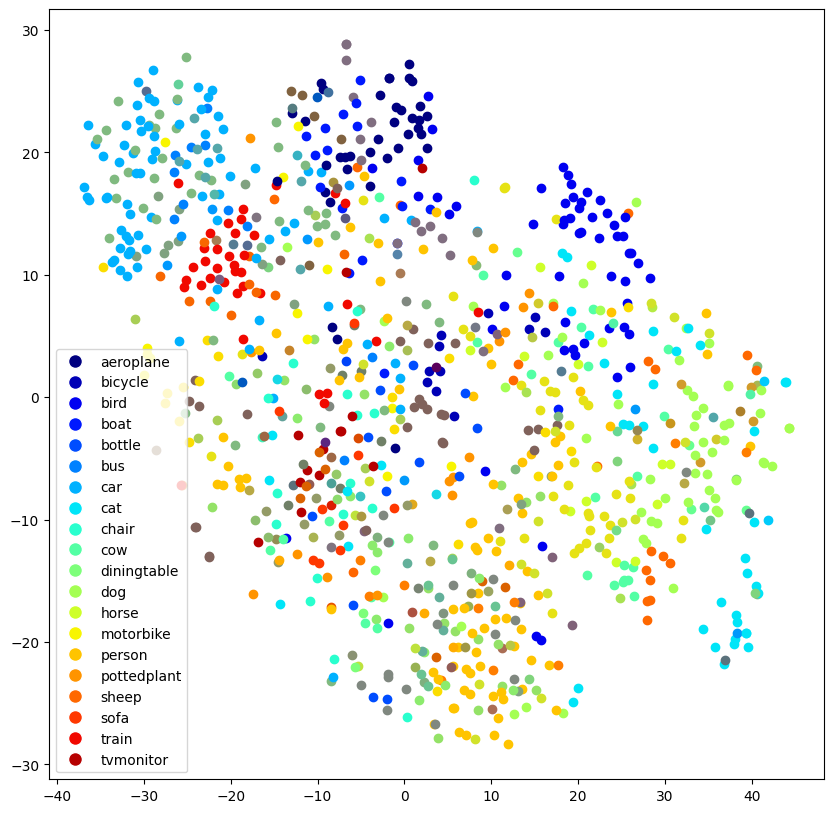

In [22]:
colors = plt.cm.jet(np.linspace(0, 1, len(VOCDataset.CLASS_NAMES), endpoint=False))
plt.figure(figsize=(10, 10))
for i, label in enumerate(labels):
    active_classes = np.where(label == 1)[0]
    mean_color = np.mean([colors[cls] for cls in active_classes], axis=0)
    plt.scatter(projected_features[i, 0], projected_features[i, 1], color=[mean_color])

plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=VOCDataset.CLASS_NAMES[i], markerfacecolor=colors[i], markersize=10) for i in range(len(VOCDataset.CLASS_NAMES))])
plt.show()